# programmable color theory
exploring color theory including supported colors, conversion between color formats using colorsys, and color schemes.

In [125]:
%matplotlib inline

from context import colormappy

import colorsys
import numpy
numpy.set_printoptions(suppress=True)  # no scientific formatting

import matplotlib.colors
import matplotlib.pyplot as plt

from colorspacious import cspace_convert

matplotlib.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

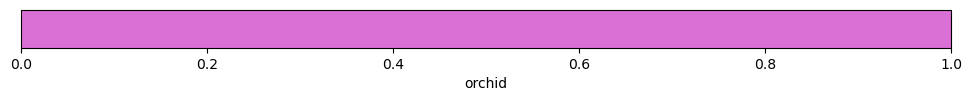

In [126]:
def plot_color(color_rgb, color_name='color'):
    fig, ax = plt.subplots(figsize=(12, 1))
    fig.subplots_adjust(bottom=0.5)
    # cmap = matplotlib.cm.cool
    # cmap = matplotlib.colors.ListedColormap([rgb_coral])
    cmap = matplotlib.colors.ListedColormap(color_rgb)
    cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap,
                                orientation='horizontal')
    cb1.set_label(color_name)
    return fig

orchid_hex = matplotlib.colors.cnames['orchid']
# print(matplotlib.colors.hex2color(orchid_hex))
orchid_rgb = matplotlib.colors.to_rgb(orchid_hex)
orchid_fig = plot_color(orchid_rgb, 'orchid')
# orchid_fig.show()

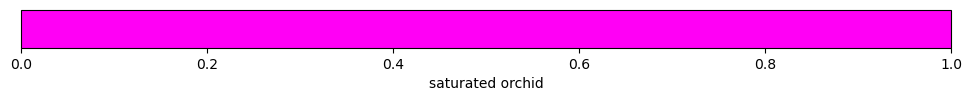

In [127]:
# working in hsl space
from colormappy.colortransforms import hls_full_saturation

saturated_orchid_rgb = hls_full_saturation(orchid_rgb)
saturated_orchid_fig = plot_color(saturated_orchid_rgb, 'saturated orchid')
# saturated_orchid_fig.show()

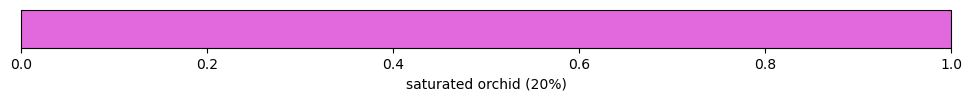

In [128]:
from colormappy.colortransforms import hls_saturate
saturated_orchid_20_rgb = hls_saturate(orchid_rgb, quantile=0.2)
saturated_orchid_20_fig = plot_color(saturated_orchid_20_rgb, 'saturated orchid (20%)')
# saturated_orchid_20_fig.show()

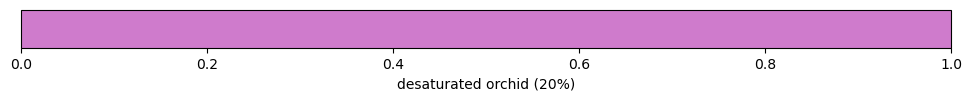

In [129]:
# synomous with tone
from colormappy.colortransforms import hls_desaturate
desaturated_orchid_20_rgb = hls_desaturate(orchid_rgb, quantile=0.2)
desaturated_orchid_20_fig = plot_color(desaturated_orchid_20_rgb, 'desaturated orchid (20%)')
# desaturated_orchid_20_fig.show()

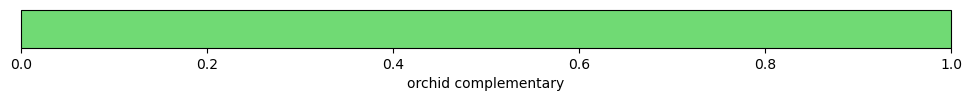

In [130]:
# Generate complementary color
from colormappy.colortransforms import hls_complementary_color
orchid_comp_rgb = hls_complementary_color(orchid_rgb)
orchid_comp_fig = plot_color(orchid_comp_rgb, 'orchid complementary')
# orchid_comp_fig.show()

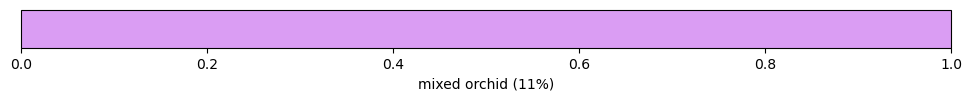

In [131]:
# color by mixing
from colormappy.colortransforms import hls_mix_colors
mixed_orchid_rgb = hls_mix_colors(color1_rgb=orchid_rgb, color2_rgb=orchid_comp_rgb, quantile=0.11)
mixed_orchid_fig = plot_color(mixed_orchid_rgb, 'mixed orchid (11%)')
# mixed_orchid_fig.show()

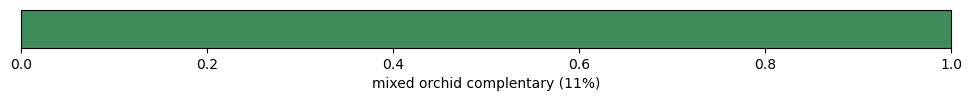

In [132]:
mixed_orchid_rgb = hls_mix_colors(color1_rgb=orchid_rgb, color2_rgb=orchid_comp_rgb, quantile=0.89)
mixed_orchid_fig = plot_color(mixed_orchid_rgb, 'mixed orchid complentary (11%)')
# mixed_orchid_fig.show()

In [133]:
white_rgb = (1.0,1.0,1.0)
white_hls = colorsys.rgb_to_hls(r=1.0, g=1.0, b=1.0)
print(white_hls)

black_rgb = (0.0,0.0,0.0)
black_hls = colorsys.rgb_to_hls(r=0.0, g=0.0, b=0.0)
print(black_hls)

grey_rgb = (0.5,0.5,0.5)
grey_hls = colorsys.rgb_to_hls(r=0.5, g=0.5, b=0.5)
print(grey_hls)

(0.0, 1.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.5, 0.0)


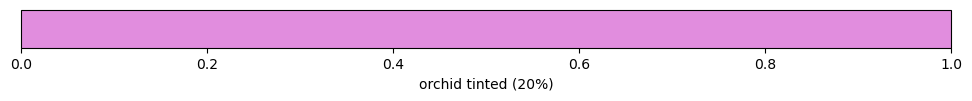

In [134]:
# synomous with tint
from colormappy.colortransforms import hls_lighten
orchid_tinted_20_rgb = hls_lighten(orchid_rgb, quantile=0.2)
orchid_tinted_20_fig = plot_color(orchid_tinted_20_rgb, 'orchid tinted (20%)')
# orchid_tinted_20_fig.show()

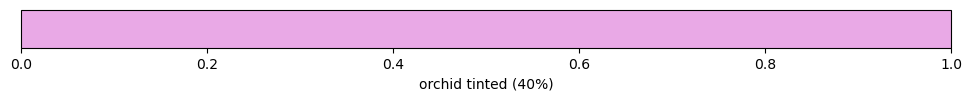

In [135]:
orchid_tinted_40_rgb = hls_lighten(orchid_rgb, quantile=0.4)
orchid_tinted_40_fig = plot_color(orchid_tinted_40_rgb, 'orchid tinted (40%)')
# orchid_tinted_40_fig.show()

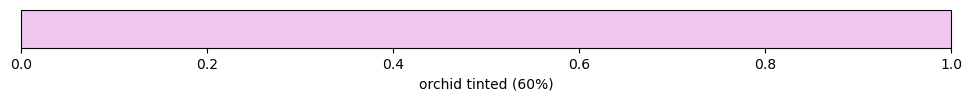

In [136]:
orchid_tinted_60_rgb = hls_lighten(orchid_rgb, quantile=0.6)
orchid_tinted_60_fig = plot_color(orchid_tinted_60_rgb, 'orchid tinted (60%)')
# orchid_tinted_60_fig.show()

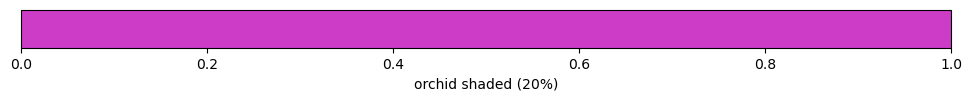

In [137]:
# synomous with shade
from colormappy.colortransforms import hls_darken
orchid_shaded_20_rgb = hls_darken(orchid_rgb, quantile=0.2)
orchid_shaded_20_fig = plot_color(orchid_shaded_20_rgb, 'orchid shaded (20%)')
# orchid_shaded_20_fig.show()

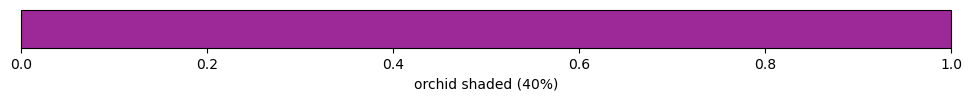

In [138]:
orchid_shaded_40_rgb = hls_darken(orchid_rgb, quantile=0.4)
orchid_shaded_40_fig = plot_color(orchid_shaded_40_rgb, 'orchid shaded (40%)')
# orchid_shaded_40_fig.show()

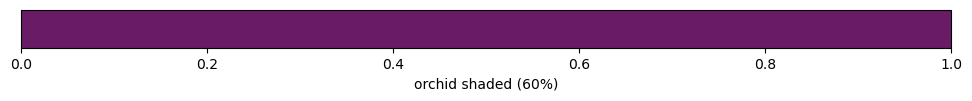

In [139]:
orchid_shaded_60_rgb = hls_darken(orchid_rgb, quantile=0.6)
orchid_shaded_60_fig = plot_color(orchid_shaded_60_rgb, 'orchid shaded (60%)')
# orchid_shaded_60_fig.show()

(0.8694117647058823, 0.49529411764705866, 0.8552941176470588)
(0.883921568627451, 0.5513725490196076, 0.8713725490196078)
(0.8984313725490195, 0.6074509803921567, 0.8874509803921566)
(0.9129411764705881, 0.6635294117647059, 0.9035294117647057)
(0.9274509803921569, 0.7196078431372548, 0.9196078431372549)
(0.9419607843137254, 0.7756862745098039, 0.9356862745098038)
(0.956470588235294, 0.831764705882353, 0.9517647058823527)
(0.9709803921568628, 0.8878431372549019, 0.967843137254902)
(0.9854901960784314, 0.943921568627451, 0.983921568627451)


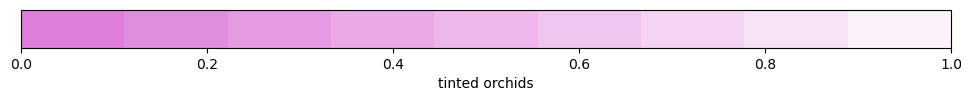

In [140]:
# color palettes by mixing
from colormappy.utils import list_of_tuples_to_array
quants = [i*0.01 for i in range(10,100,10)]
orchid_tints = []
for q in quants:
    tinted_rgb = hls_lighten(orchid_rgb, quantile=q)
    print(tinted_rgb)
    orchid_tints.append(tinted_rgb)

tinted_orchids_rgb = list_of_tuples_to_array(orchid_tints)
tinted_orchids_fig = plot_color(tinted_orchids_rgb, 'tinted orchids')
# tinted_orchids_fig.show()

(0.8283006535947712, 0.3364052287581698, 0.8097385620915031)
(0.8016993464052284, 0.23359477124183026, 0.7802614379084962)
(0.7196732026143787, 0.18620915032679752, 0.6995424836601303)
(0.6168627450980391, 0.15960784313725496, 0.5996078431372547)
(0.5140522875816992, 0.1330065359477125, 0.49967320261437886)
(0.41124183006535936, 0.10640522875816999, 0.3997385620915031)
(0.3084313725490194, 0.07980392156862748, 0.29980392156862723)
(0.20562091503267962, 0.053202614379084995, 0.1998692810457515)
(0.10281045751633981, 0.026601307189542497, 0.09993464052287575)


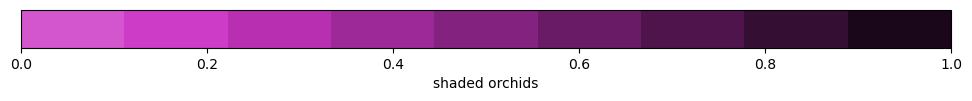

In [141]:
orchid_shades = []
for q in quants:
    shaded_rgb = hls_darken(orchid_rgb, quantile=q)
    print(shaded_rgb)
    orchid_shades.append(shaded_rgb)

shaded_orchids_rgb = list_of_tuples_to_array(orchid_shades)
shaded_orchids_fig = plot_color(shaded_orchids_rgb, 'shaded orchids')
# shaded_orchids_fig.show()

(0.8341176470588234, 0.45999999999999996, 0.8199999999999998)
(0.8133333333333334, 0.48078431372549, 0.8007843137254902)
(0.7925490196078431, 0.5015686274509803, 0.7815686274509803)
(0.7717647058823527, 0.5223529411764707, 0.7623529411764702)
(0.7509803921568626, 0.5431372549019607, 0.7431372549019606)
(0.7301960784313726, 0.5639215686274508, 0.7239215686274509)
(0.7094117647058822, 0.5847058823529412, 0.704705882352941)
(0.6886274509803921, 0.6054901960784312, 0.6854901960784313)
(0.6678431372549019, 0.6262745098039215, 0.6662745098039214)


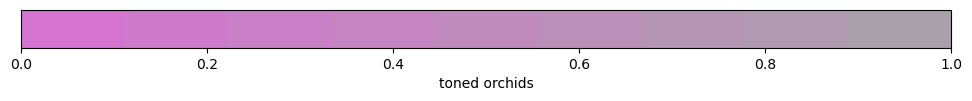

In [142]:
orchid_tones = []
for q in quants:
    toned_rgb = hls_desaturate(orchid_rgb, quantile=q)
    print(toned_rgb)
    orchid_tones.append(toned_rgb)

toned_orchids_rgb = list_of_tuples_to_array(orchid_tones)
toned_orchids_fig = plot_color(toned_orchids_rgb, 'toned orchids')
# toned_orchids_fig.show()

### darken, lighten, and other color transforms in uniform color space(s)¶

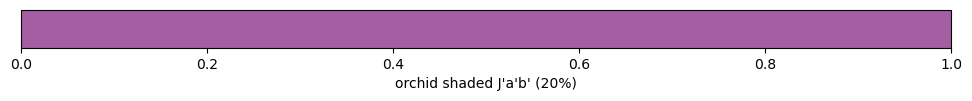

In [143]:
# shading, tinting, and toning via interpolation with black, white, or grey in uniform color space
from colormappy.colortransforms import Jpapbp_darken
orchid_shaded20_sRGB = Jpapbp_darken(base_rgb=orchid_rgb, quantile=0.2)
orchid_shaded20_sRGB_fig = plot_color(orchid_shaded20_sRGB, "orchid shaded J'a'b' (20%)")
# orchid_shaded20_sRGB_fig.show()

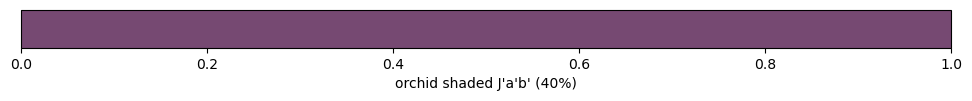

In [144]:
orchid_shaded40_sRGB = Jpapbp_darken(base_rgb=orchid_rgb, quantile=0.4)
orchid_shaded40_sRGB_fig = plot_color(orchid_shaded40_sRGB, "orchid shaded J'a'b' (40%)")
# orchid_shaded40_sRGB_fig.show()

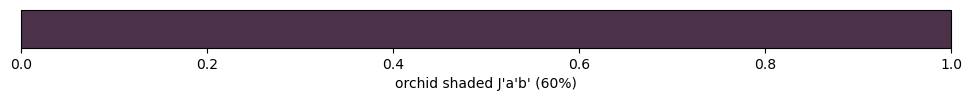

In [145]:
orchid_shaded60_sRGB = Jpapbp_darken(base_rgb=orchid_rgb, quantile=0.6)
orchid_shaded60_sRGB_fig = plot_color(orchid_shaded60_sRGB, "orchid shaded J'a'b' (60%)")
# orchid_shaded60_sRGB_fig.show()

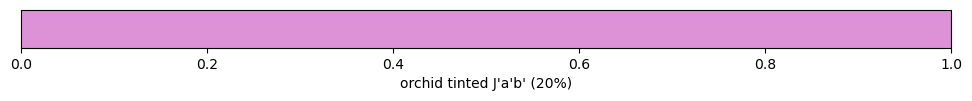

In [146]:
from colormappy.colortransforms import Jpapbp_lighten
orchid_tinted20_sRGB = Jpapbp_lighten(base_rgb=orchid_rgb, quantile=0.2)
orchid_tinted20_sRGB_fig = plot_color(orchid_tinted20_sRGB, "orchid tinted J'a'b' (20%)")
# orchid_tinted20_sRGB_fig.show()

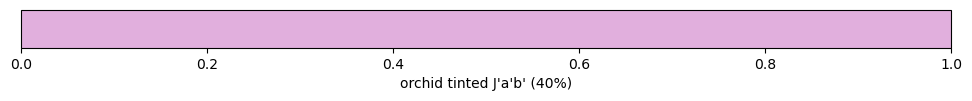

In [147]:
orchid_tinted40_sRGB = Jpapbp_lighten(base_rgb=orchid_rgb, quantile=0.4)
orchid_tinted40_sRGB_fig = plot_color(orchid_tinted40_sRGB, "orchid tinted J'a'b' (40%)")
# orchid_tinted40_sRGB_fig.show()

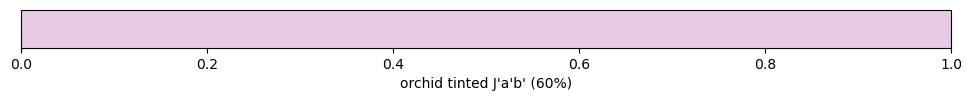

In [148]:
orchid_tinted60_sRGB = Jpapbp_lighten(base_rgb=orchid_rgb, quantile=0.6)
orchid_tinted60_sRGB_fig = plot_color(orchid_tinted60_sRGB, "orchid tinted J'a'b' (60%)")
# orchid_tinted60_sRGB_fig.show()

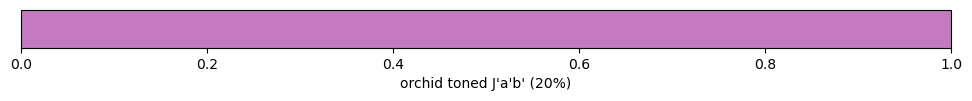

In [149]:
from colormappy.colortransforms import Jpapbp_tone
orchid_toned20_sRGB = Jpapbp_tone(base_rgb=orchid_rgb, quantile=0.2)
orchid_toned20_sRGB_fig = plot_color(orchid_toned20_sRGB, "orchid toned J'a'b' (20%)")
# orchid_toned20_sRGB_fig.show()

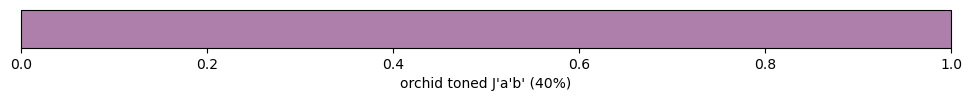

In [150]:
orchid_toned40_sRGB = Jpapbp_tone(base_rgb=orchid_rgb, quantile=0.4)
orchid_toned40_sRGB_fig = plot_color(orchid_toned40_sRGB, "orchid toned J'a'b' (40%)")
# orchid_toned40_sRGB_fig.show()

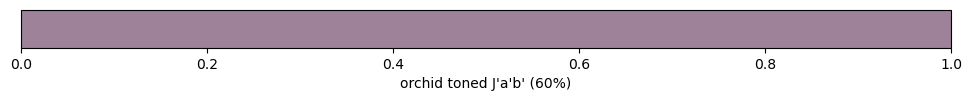

In [151]:
orchid_toned60_sRGB = Jpapbp_tone(base_rgb=orchid_rgb, quantile=0.6)
orchid_toned60_sRGB_fig = plot_color(orchid_toned60_sRGB, "orchid toned J'a'b' (60%)")
# orchid_toned60_sRGB_fig.show()

(12, 3)


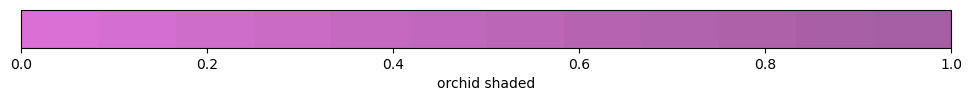

In [152]:
# nonlinear shading
orchid_shaded_list = [orchid_rgb]
for n in range(11):
    tmp = orchid_shaded_list[-1]
    orchid_shaded_rgb = Jpapbp_darken(base_rgb=tmp, quantile=0.02)  # 2 % darker each iteration
    orchid_shaded_list.append(orchid_shaded_rgb)
orchid_shaded_rgb_array = numpy.array(orchid_shaded_list)
print(orchid_shaded_rgb_array.shape)
orchid_shaded_sRGB_fig = plot_color(orchid_shaded_rgb_array, 'orchid shaded')
# orchid_shaded_sRGB_fig.show()

(12, 3)


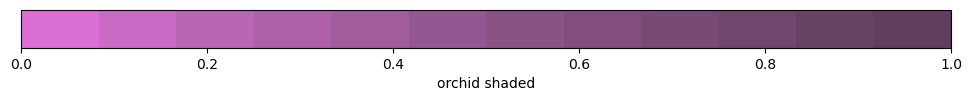

In [153]:
# nonlinear shading
orchid_shaded_list = [orchid_rgb]
for n in range(11):
    tmp = orchid_shaded_list[-1]
    orchid_shaded_rgb = Jpapbp_darken(base_rgb=tmp, quantile=0.06)  # 6 % darker each iteration
    orchid_shaded_list.append(orchid_shaded_rgb)
orchid_shaded_rgb_array = numpy.array(orchid_shaded_list)
print(orchid_shaded_rgb_array.shape)
orchid_shaded_sRGB_fig = plot_color(orchid_shaded_rgb_array, 'orchid shaded')
# orchid_shaded_sRGB_fig.show()

(12, 3)


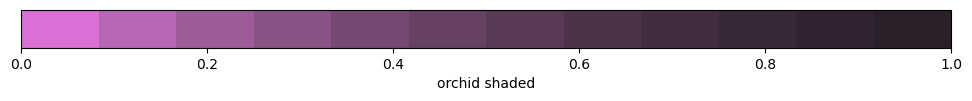

In [154]:
# nonlinear shading
orchid_shaded_list = [orchid_rgb]
for n in range(11):
    tmp = orchid_shaded_list[-1]
    orchid_shaded_rgb = Jpapbp_darken(base_rgb=tmp, quantile=0.12)  # 12 % darker each iteration
    orchid_shaded_list.append(orchid_shaded_rgb)
orchid_shaded_rgb_array = numpy.array(orchid_shaded_list)
print(orchid_shaded_rgb_array.shape)
orchid_shaded_sRGB_fig = plot_color(orchid_shaded_rgb_array, 'orchid shaded')
# orchid_shaded_sRGB_fig.show()

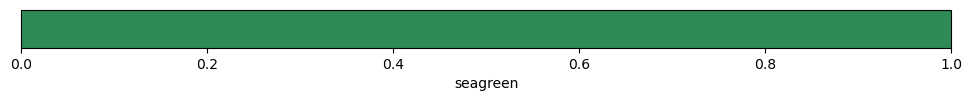

In [155]:
seagreen_hex = matplotlib.colors.cnames['seagreen']
seagreen_rgb = matplotlib.colors.to_rgb(seagreen_hex)
seagreen_rgb_fig = plot_color(seagreen_rgb, 'seagreen')
# seagreen_rgb_fig.show()

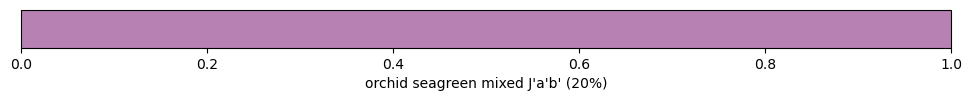

In [156]:
from colormappy.colortransforms import Jpapbp_mix_colors
orchid_seagreen_mixed = Jpapbp_mix_colors(color1_rgb=orchid_rgb, color2_rgb=seagreen_rgb, quantile=0.2)
orchid_seagreen_mixed_fig = plot_color(orchid_seagreen_mixed, "orchid seagreen mixed J'a'b' (20%)")
# orchid_seagreen_mixed_fig.show()

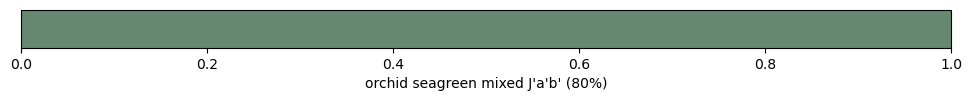

In [157]:
orchid_seagreen_mixed = Jpapbp_mix_colors(color1_rgb=orchid_rgb, color2_rgb=seagreen_rgb, quantile=0.8)
orchid_seagreen_mixed_fig = plot_color(orchid_seagreen_mixed, "orchid seagreen mixed J'a'b' (80%)")
# orchid_seagreen_mixed_fig.show()

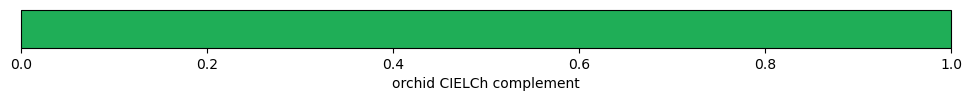

In [158]:
from colormappy.colortransforms import CIELCh_complementary
orchid_CIELCh_complement_sRGB1 = CIELCh_complementary(orchid_rgb)
orchid_CIELCh_complement_sRGB1_fig = plot_color(orchid_CIELCh_complement_sRGB1, "orchid CIELCh complement")
# orchid_CIELCh_complement_sRGB1_fig.show()

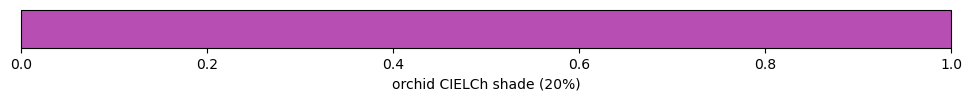

In [159]:
# synomous with shade
from colormappy.colortransforms import CIELCh_darken    
orchid_CIELCh_shade_sRGB1 = CIELCh_darken(orchid_rgb, quantile=0.2)
orchid_CIELCh_shade_sRGB1_fig = plot_color(orchid_CIELCh_shade_sRGB1, "orchid CIELCh shade (20%)")
# orchid_CIELCh_shade_sRGB1_fig.show() 

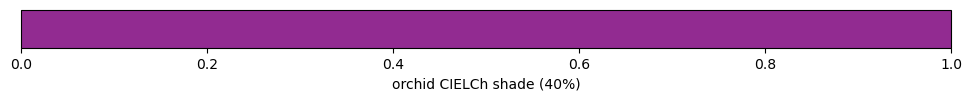

In [160]:
orchid_CIELCh_shade_sRGB1 = CIELCh_darken(orchid_rgb, quantile=0.4)
orchid_CIELCh_shade_sRGB1_fig = plot_color(orchid_CIELCh_shade_sRGB1, "orchid CIELCh shade (40%)")
# orchid_CIELCh_shade_sRGB1_fig.show()

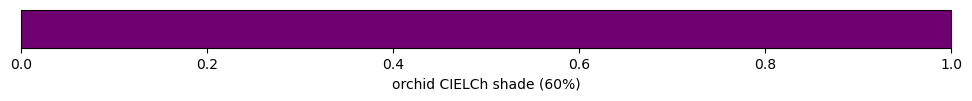

In [161]:
orchid_CIELCh_shade_sRGB1 = CIELCh_darken(orchid_rgb, quantile=0.6)
orchid_CIELCh_shade_sRGB1_fig = plot_color(orchid_CIELCh_shade_sRGB1, "orchid CIELCh shade (60%)")
# orchid_CIELCh_shade_sRGB1_fig.show()

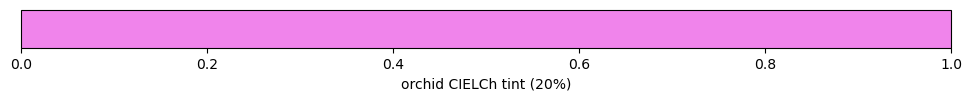

In [162]:
# synomous with tint
from colormappy.colortransforms import CIELCh_lighten    
orchid_CIELCh_tint_sRGB1 = CIELCh_lighten(orchid_rgb, quantile=0.2)
orchid_CIELCh_tint_sRGB1_fig = plot_color(orchid_CIELCh_tint_sRGB1, "orchid CIELCh tint (20%)")
# orchid_CIELCh_tint_sRGB1_fig.show() 

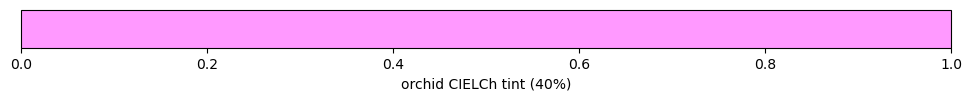

In [163]:
orchid_CIELCh_tint_sRGB1 = CIELCh_lighten(orchid_rgb, quantile=0.4)
orchid_CIELCh_tint_sRGB1_fig = plot_color(orchid_CIELCh_tint_sRGB1, "orchid CIELCh tint (40%)")
# orchid_CIELCh_tint_sRGB1_fig.show() 

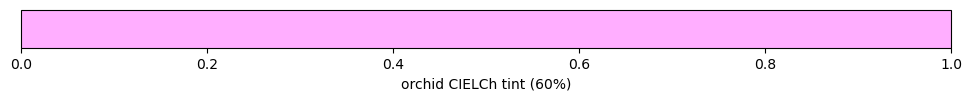

In [164]:
orchid_CIELCh_tint_sRGB1 = CIELCh_lighten(orchid_rgb, quantile=0.6)
orchid_CIELCh_tint_sRGB1_fig = plot_color(orchid_CIELCh_tint_sRGB1, "orchid CIELCh tint (60%)")
# orchid_CIELCh_tint_sRGB1_fig.show() 

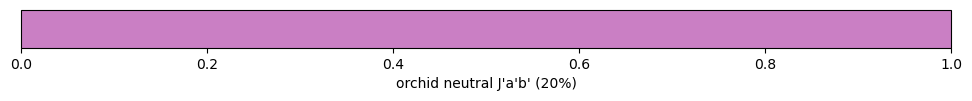

In [165]:
from colormappy.colortransforms import Jpapbp_neutral
orchid_neutral20_sRGB1 = Jpapbp_neutral(base_rgb=orchid_rgb, quantile=0.2)
orchid_neutral20_sRGB1_fig = plot_color(orchid_neutral20_sRGB1, "orchid neutral J'a'b' (20%)")
# orchid_neutral20_sRGB1_fig.show()

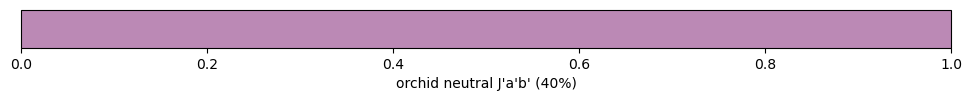

In [166]:
orchid_neutral40_sRGB1 = Jpapbp_neutral(base_rgb=orchid_rgb, quantile=0.4)
orchid_neutral40_sRGB1_fig = plot_color(orchid_neutral40_sRGB1, "orchid neutral J'a'b' (40%)")
# orchid_neutral40_sRGB1_fig.show()

### color schemes

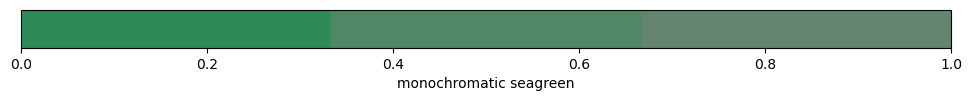

In [167]:
# monochromatic : interpolate between color and grey in CAM02-UCS
def monochromatic_scheme(base_rgb, n_outputs=3, end_quantile=0.5) -> numpy.ndarray:
    # base_rgb is an iterable of length 3
    # assert end_quantile between 0.0 and 1.0
    mono_rgb_array = numpy.empty(shape=(n_outputs,3))
    n_vals = numpy.linspace(start=0.0, stop=end_quantile, num=n_outputs, endpoint=True)
    for n in range(n_outputs):
        mono_rgb_array[n,:] = Jpapbp_mix_colors(color1_rgb=base_rgb, color2_rgb=(0.5,0.5,0.5), quantile=n_vals[n])
    return mono_rgb_array
    
mono_seagreen = monochromatic_scheme(base_rgb=seagreen_rgb, n_outputs=3)
mono_seagreen_sRGB_fig = plot_color(mono_seagreen, 'monochromatic seagreen')
# mono_seagreen_sRGB_fig.show()

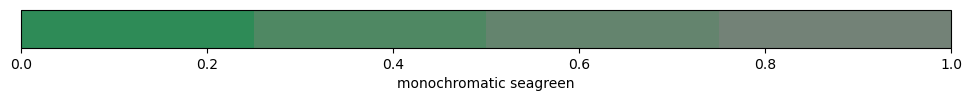

In [168]:
mono_seagreen = monochromatic_scheme(base_rgb=seagreen_rgb, n_outputs=4, end_quantile=0.72)
mono_seagreen_sRGB_fig = plot_color(mono_seagreen, 'monochromatic seagreen')
# mono_seagreen_sRGB_fig.show()

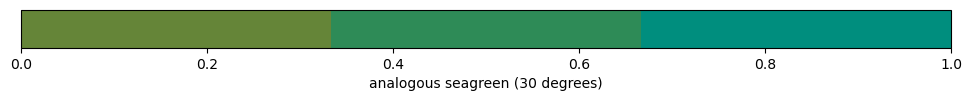

In [169]:
# color schemes: analogous CIELCh : h +- 30 degrees
def analogous_scheme(base_rgb, degrees=30) -> numpy.ndarray:
    # assert degrees is less than 180
    base_LCh = cspace_convert(base_rgb, "sRGB1", "CIELCh")
    base_minusD_LCh = numpy.copy(base_LCh)
    base_plusD_LCh = numpy.copy(base_LCh)

    base_minusD_LCh[2] = base_LCh[2] - degrees
    if base_minusD_LCh[2] < 0:
        base_minusD_LCh[2] = base_minusD_LCh[2] + 360  # wrap
    anag_base_minusD_rgb = cspace_convert(base_minusD_LCh, "CIELCh", "sRGB1")
    #print(anag_base_minusD_rgb)

    base_plusD_LCh[2] = base_LCh[2] + degrees
    if base_plusD_LCh[2] > 360:
        base_plusD_LCh[2] = base_plusD_LCh[2] - 360  # wrap
    anag_base_plusD_rgb = cspace_convert(base_plusD_LCh, "CIELCh", "sRGB1")
    #print(anag_base_plusD_rgb)
    
    arr = numpy.array([anag_base_minusD_rgb, base_rgb, anag_base_plusD_rgb])
    return numpy.clip(arr, 0.0, 1.0)

anag_seagreen = analogous_scheme(base_rgb=seagreen_rgb, degrees=30)
anag_seagreen_sRGB_fig = plot_color(anag_seagreen, "analogous seagreen (30 degrees)")
# anag_seagreen_sRGB_fig.show()

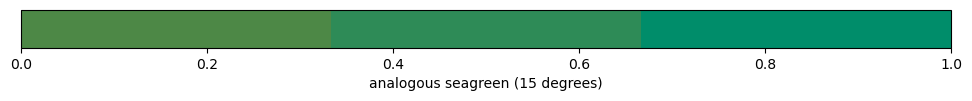

In [170]:
anag_seagreen = analogous_scheme(base_rgb=seagreen_rgb, degrees=15)
anag_seagreen_sRGB_fig = plot_color(anag_seagreen, "analogous seagreen (15 degrees)")
# anag_seagreen_sRGB_fig.show()

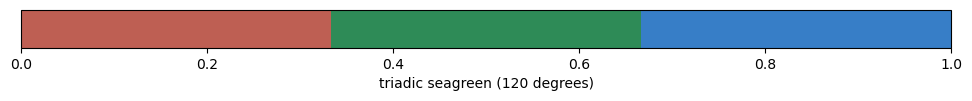

In [171]:
def triadic_scheme(base_rgb) -> numpy.ndarray:
    return analogous_scheme(base_rgb=base_rgb, degrees=120)

triad_seagreen = triadic_scheme(base_rgb=seagreen_rgb)
triad_seagreen_sRGB_fig = plot_color(triad_seagreen, "triadic seagreen (120 degrees)")
# triad_seagreen_sRGB_fig.show()